In [19]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

import numpy as np; np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate

from simulate import ODE_simulate, GILL_simulate
from plot_module import plot_ODE, plot_gillespie, plot_network
from sim_param_from_network import names_from_network, gillespie_param_from_network, dataframes_from_network, ODE_from_network
from network_generate import network_gen_chain, network_gen_ring, network_gen_powlaw_tree

import libgillespie

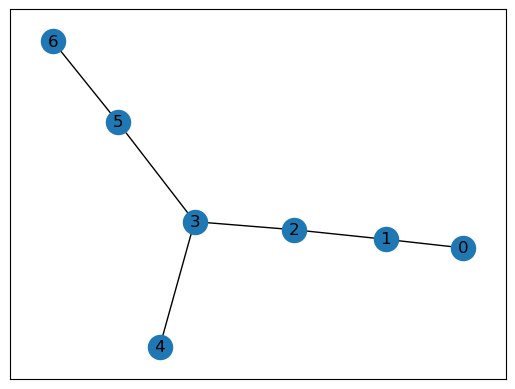

In [67]:
G = nx.path_graph(4)
G.add_edge(3, 5)
G.add_edge(5, 6)
G.add_edge(3, 4)
nx.draw_networkx(G)

/tmp/ipykernel_13739/79165447.py:27: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw_networkx(H, pos = graphviz_layout(H, prog="neato"))


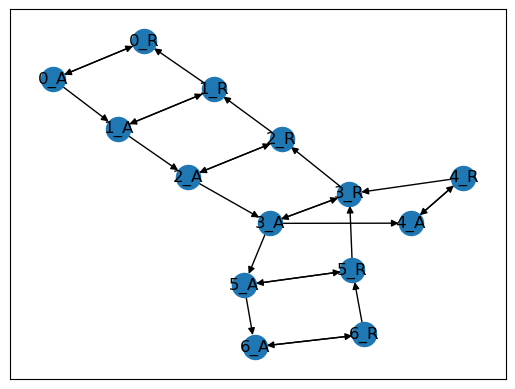

In [69]:
input_nodes = G.nodes()


# isolate out biological parameters
gamma_ant = float(bio_param['gamma_ant'])
gamma_ret = float(bio_param['gamma_ret'])
switch_rate = float(bio_param['switch_rate'])


# create new empty graph
H = nx.DiGraph()

for i, node in enumerate(input_nodes):
    # add separate anterograde and retrograde nodes
    node_name_ant = f"{node}_A"
    node_name_ret = f"{node}_R"
    
    H.add_node(node_name_ant)
    H.add_node(node_name_ret)
    
    # add edge for switching between anterograde and retrograde directions
    H.add_edge(node_name_ant, node_name_ret)
    H.add_edge(node_name_ret, node_name_ant)
    
    # add connections to predecessor nodes
    if i != 0:
        
        prev_node_name_ant = f"{nx.predecessor(G, 0, node)[0]}_A"
        prev_node_name_ret = f"{nx.predecessor(G, 0, node)[0]}_R"
        
        H.add_edge(prev_node_name_ant, node_name_ant)
        H.add_edge(node_name_ret, prev_node_name_ret)
        
        
    
nx.draw_networkx(H, pos = graphviz_layout(H, prog="neato"))